<a href="https://colab.research.google.com/github/Jeeva55t/SuperVisedMachineLearning/blob/main/TitanicSurvivalClassification_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df = df.drop('Cabin',axis = 1)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.fillna(df['Age'].mean(),inplace = True)

In [ ]:
 df.fillna(df['Embarked'].mode() , inplace = True)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: >

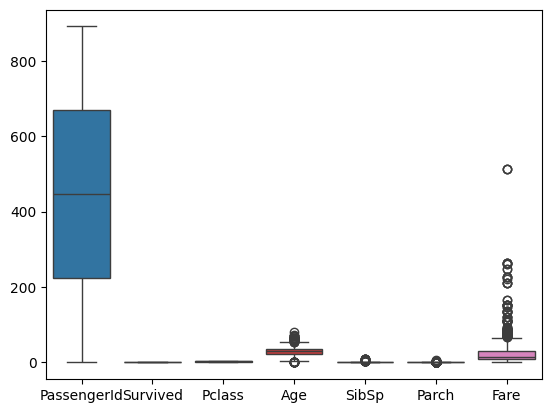

In [ ]:
sns.boxplot(df)

In [83]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = df[col].astype('str')
    df[col] = Le.fit_transform(df[col])

In [ ]:
for col in df:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[col] = np.where(df[col] <= lower_bound ,df[col].mean(),df[col])
  df[col] = np.where(df[col] >= upper_bound ,df[col].mean(),df[col])

In [ ]:
sns.boxplot(df)

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop('Survived',axis = 1)
y = df['Survived']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 ,random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
y_pred = Lr.predict(x_test)
print(accuracy_score(y_test,y_pred))


In [ ]:
import pickle

with open('model.pkl','wb') as f:
  pickle.dump(Lr,f)